In [1]:
from models.preparation import import_data, get_dtypes, compute_correlation,categorical_variables_selection,encode,normalize,plot_all_histograms,cramers_v_table,knnImpute
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', None)



c:\Users\idris\Desktop\ISF_S1\ML en pratique\projet_ml\models\preparation.py:26: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True # '' ou numpy.inf considérées comme des NA


In [2]:
input_path="01_Input_Data/bank-additional-full.csv"
data=import_data(input_path)


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Nous avons bien 20 colonnes en tout (étant donné que nous avons supprimé la colonne Duration comme demandé)

In [4]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


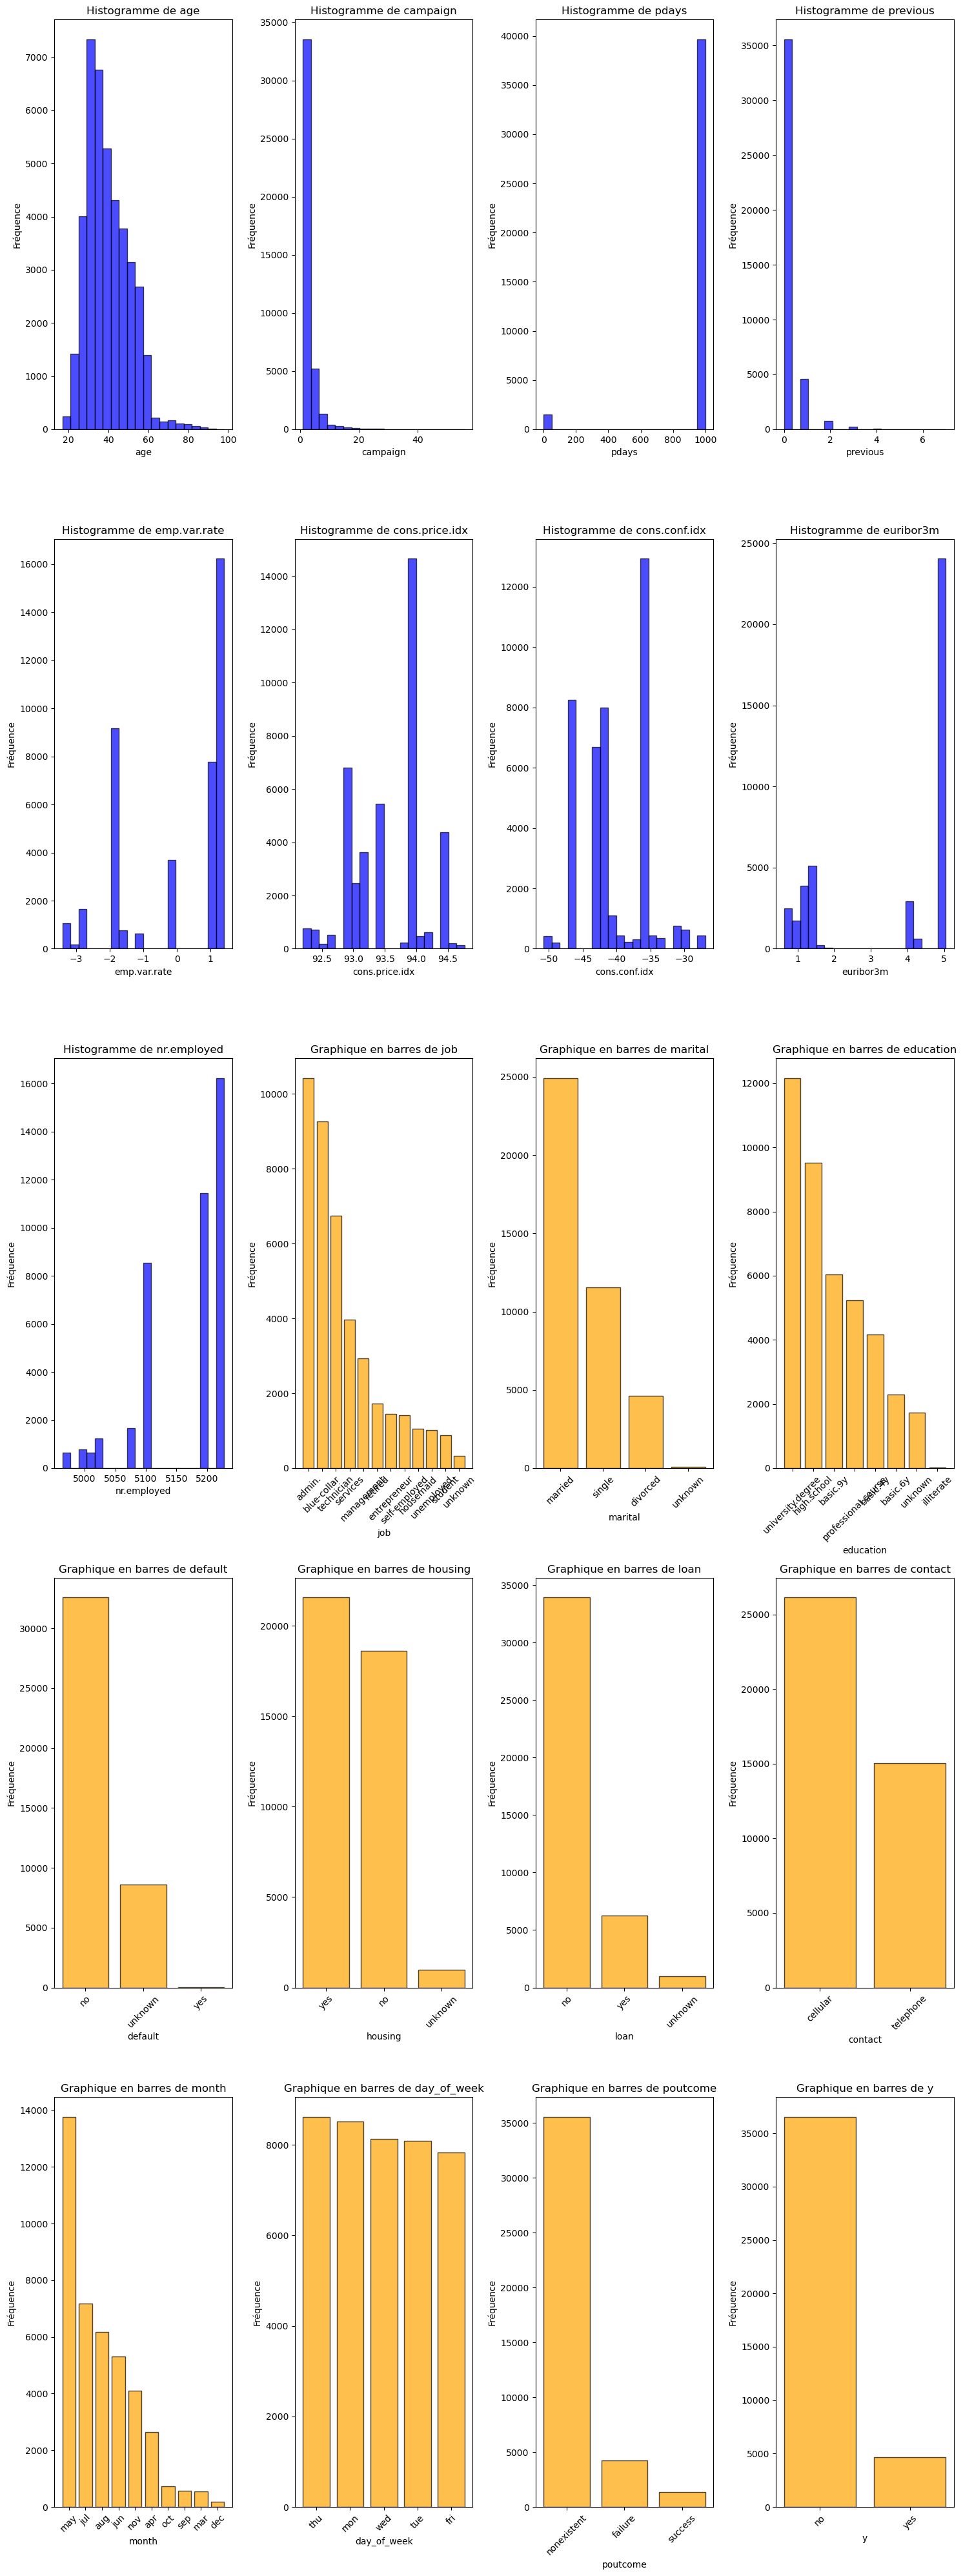

In [5]:
plot_all_histograms(data,bins=20)

On remarque beaucoup d'Uknown présents dans les données catégorielles (en jaune), on va chercher à les enlever dans la suite, soit en supprimant les individus les contenant, soit en utilisant un algorithme knn (on va devoir encoder les données avant).

On choisit ici d'enlever la colonne 'Default' car ne contient que 3 yes ainsi que beaucoup de données manquantes, elle ne nous apprend pas grand chose.

In [6]:
yes_default = data[data['default'] == 'yes']
yes_default

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [7]:
data=data.drop(columns=['default'])


# Traitement des 'unknown'

Nous choisissons de supprimer les individus avec des unknown dans les colonnes à faible proportion de unknown (job,marital,housing et loan) et utiliser knn sur education

In [8]:
#Remplacement des 'unknown' par np.nan
data_copy = data.replace('unknown', np.nan)
#Suppression des individus avec les na dans les colonnes correspondantes
data_copy=data_copy.dropna(subset=['job','marital','housing','loan'])

Encodage des données

In [ ]:
data_copy=encode(data=data_copy,method="ordinal")

In [10]:
data_copy=knnImpute(data=data_copy,columns=['education'],n_neighbors=100)

KNN sur la colonne 'education'

On réaffiche les histogrammes pour s'assurer que l'on a bien réalisé la tâche

<Axes: >

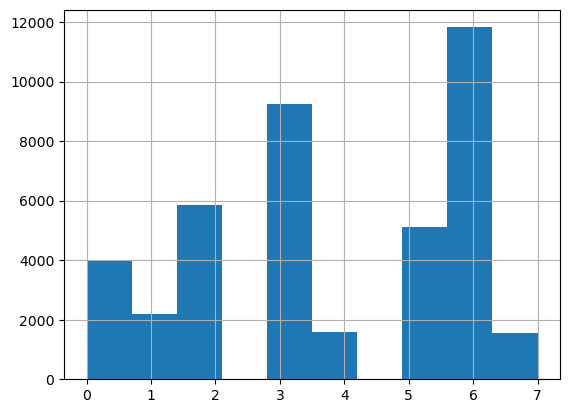

In [11]:
data_copy['education'].hist()

# Variables numériques

On va calculer les corrélations et enlever les variables numériques qui sont corrélées à plus de 0.7 

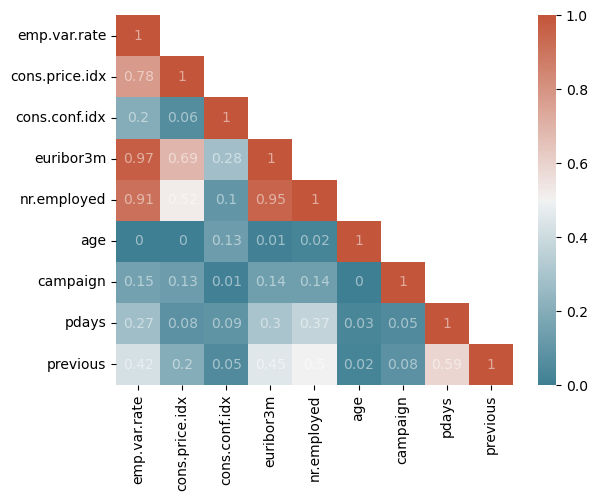

In [12]:
correlation = compute_correlation(data=data)

In [13]:
#data = variables_selection(correlation_threshold=0.7,data=data)
data=data.drop(columns=['emp.var.rate'])

,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,campaign,pdays,previous
cons.price.idx,1.00,0.06,0.69,0.52,0.00,0.13,0.08,0.20
cons.conf.idx,0.06,1.00,0.28,0.10,0.13,0.01,0.09,0.05
euribor3m,0.69,0.28,1.00,0.95,0.01,0.14,0.30,0.45
nr.employed,0.52,0.10,0.95,1.00,0.02,0.14,0.37,0.50
age,0.00,0.13,0.01,0.02,1.00,0.00,0.03,0.02
campaign,0.13,0.01,0.14,0.14,0.00,1.00,0.05,0.08
pdays,0.08,0.09,0.30,0.37,0.03,0.05,1.00,0.59
previous,0.20,0.05,0.45,0.50,0.02,0.08,0.59,1.00


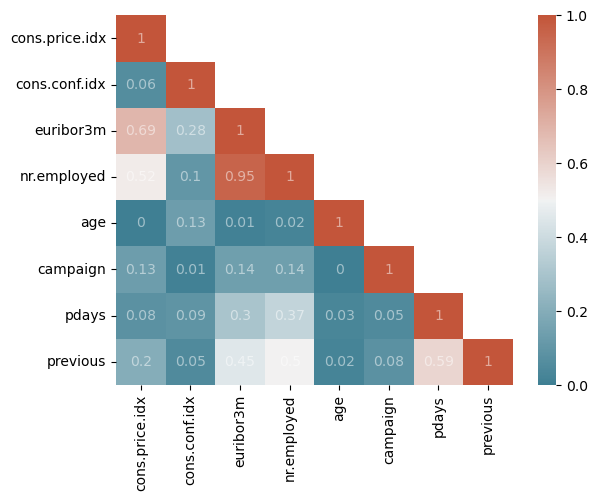

In [14]:
compute_correlation(data=data)

# Variables catégorielles

In [15]:
# def cramers_V(var1,var2) :
#     crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
#     stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
#     obs = np.sum(crosstab) # Number of observations
#     mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table

#     return (stat/(obs*mini))
# labels_categorielles = dtype_to_column[np.dtype('O')]
# vars_categorielles = data[labels_categorielles]

# # Test du V de Cramer
# rows= []

# for var1 in vars_categorielles:
#   col = []
#   for var2 in tqdm(vars_categorielles) :
#     cramers = cramers_V(vars_categorielles[var1], vars_categorielles[var2]) # V de Cramer
#     col.append(round(cramers,2)) # arrondi du résultat   
#   rows.append(col)
  
# cramers_results = np.array(rows)
# v_cramer_resultats = pd.DataFrame(cramers_results, columns = vars_categorielles.columns, 
#                                   index =vars_categorielles.columns)

# v_cramer_resultats

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
job,1.000000,0.184310,0.359867,0.019496,0.019274,0.128894,0.111032,0.023193,0.100890,0.152768
marital,0.184310,1.000000,0.116964,0.012527,0.006356,0.072497,0.052304,0.014685,0.037611,0.054570
education,0.359867,0.116964,1.000000,0.018635,0.013012,0.123988,0.095856,0.023643,0.044245,0.068472
housing,0.019496,0.012527,0.018635,1.000000,0.707870,0.084889,0.056220,0.017643,0.018333,0.011748
loan,0.019274,0.006356,0.013012,0.707870,1.000000,0.025189,0.024733,0.011592,0.004404,0.005154
contact,0.128894,0.072497,0.123988,0.084889,0.025189,1.000000,0.609259,0.055783,0.242516,0.144693
month,0.111032,0.052304,0.095856,0.056220,0.024733,0.609259,1.000000,0.068187,0.242845,0.274395
day_of_week,0.023193,0.014685,0.023643,0.017643,0.011592,0.055783,0.068187,1.000000,0.017597,0.025195
poutcome,0.100890,0.037611,0.044245,0.018333,0.004404,0.242516,0.242845,0.017597,1.000000,0.320488
y,0.152768,0.054570,0.068472,0.011748,0.005154,0.144693,0.274395,0.025195,0.320488,1.000000


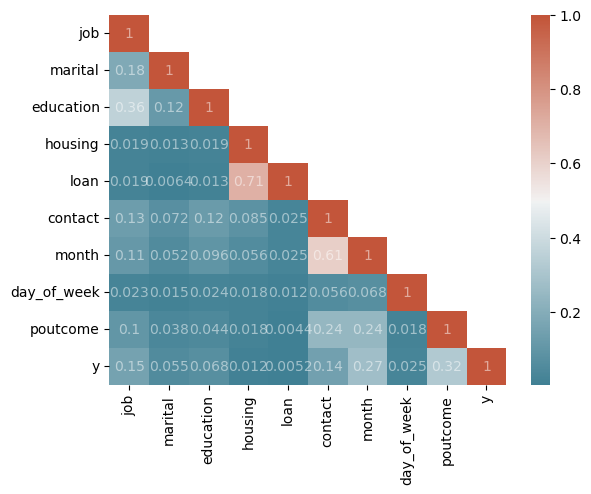

In [16]:
cramers_v_table(df=data)

In [17]:
data=categorical_variables_selection(data,testcramerV_threshold=0.75)


In [18]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Normalisation des données

In [19]:
data=normalize(data=data,columns_to_scale=[col for col in data.columns if data[col].abs().max() > 1]) #On utilise un StandardScaler ici et on scale uniquement les colonnes dont la valeur max en valeur absolue est supétrieure à 1
data.head()

TypeError: bad operand type for abs(): 'str'

# Train/Test Split

Le train/test Split sera fait en 70/30